<a href="https://colab.research.google.com/github/joykiriba/DS-CORE-WEEK8-IP/blob/main/IP_WEEK8_%22Moringa_Data_Science_Core_W8_Independent_Project_2021_06_Joy_Kiriba_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nairobi Hospital clinical camp to test for hypothyroidism

> Indented block



##**1**. Defining the Question




### a) Specifying the Data Analytic Question

Determine whether or not the patient's symptoms indicate that the patient has hypothyroidism?

### b) Defining the Metric for Success
The project will be a success if we are able to create a model that will accurately predict whether or not a patient symptoms indicate that the patient has hypothyroid.


### c) Understanding the context
Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Hypothyroidism is tested using personal and family history, Physical examinations and blood tests. 

Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women.

Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain.
Treatment consists of thyroid hormone replacement.

Blood tests are the only way to reliably confirm a diagnosis of hypothyroidism.

A thyroid-stimulating hormone (TSH) test measures how much TSH your pituitary gland is creating:

If your thyroid isn’t producing enough hormones, the pituitary gland will boost TSH to increase thyroid hormone production.

If you have hypothyroidism, your TSH levels will be high, as your body is trying to stimulate more thyroid hormone activity.

A thyroxine (T4) level test is also useful in diagnosing hypothyroidism. T4 is one of the hormones directly produced by your thyroid. Used together, T4 and TSH tests help evaluate thyroid function.

Typically, if you have a low level of T4 along with a high level of TSH, you have hypothyroidism.






### d) Recording the Experimental Design
### The process will entail: 
* Define the question, the metric for success, the context, experimental design taken.

* Read and explore the given dataset.

* Define the appropriateness of the available data to answer the given question.

* Find and deal with outliers, anomalies, and missing data within the dataset.

* Perform univariate, bivariate and multivariate analysis recording my observations.

* Building Decision Tree models using 2 out of the 3 advanced models.
  * Optimizing the models.
  * Identifying which of the 2 models is the most trusted
  * Using the trusted model to select the most important features that are impactful in prediction.
* Building Support Vector Machine Models using the linear, polynomial and the radial basic function.
* Picking the kernel that performs the best and also tune the parameters t improve the performance of the models.
* Use the best performing kernel together with the tuned hyperparameters and predict using aditional features.
* Compare the model with the feauters version.
* Challenge our solution and give recommendations as to how we could improve the model performance.  


### e) Data Relevance

The data provided is very relevant and has a wide range of variables to consider in achieving our main objective of this project.
[Hypothyroidism](http://bit.ly/hypothyroid_data)



##**2**. Reading the Data

In [1]:
# importing necessary libraries
# 

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import  accuracy_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


In [2]:
# Loading the Data from the source- house data
# ---
#
hypothyroid = pd.read_csv('hypothyroid.csv')



##**3**. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
hypothyroid.shape

(3163, 26)

In [4]:
# Previewing our dataset
#
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
# Previewing the bottom of our dataset
# 
hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
# Checking whether each column has appropriate datatypes
#
hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [7]:
# to get general info of the dataframe
# 

hypothyroid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [8]:
# to get a statistical summary of the dataframe
# 

hypothyroid.describe()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


##**4**. External Data Source Validation

### a.Validation

##**5**. Tidying the Dataset

In [9]:
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [10]:
# check for duplicates
# 

hypothyroid.duplicated().sum()


77

In [11]:
# removing duplicates
#
hypothyroid = hypothyroid.drop_duplicates()

# Checking to confirm whether duplicates have been dropped
#

hypothyroid.duplicated().sum()

0

In [12]:
hypothyroid.shape

(3086, 26)

In [13]:
# Identifying the Missing Data
#
hypothyroid.isnull().sum()



status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [14]:
# Checking for unique values in each column
# 

for column in hypothyroid.columns:
  print(column)
  print(hypothyroid[column].nunique())
  print(hypothyroid[column].unique())
  print('\n')

status
2
['hypothyroid' 'negative']


age
93
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


sex
3
['M' 'F' '?']


on_thyroxine
2
['f' 't']


query_on_thyroxine
2
['f' 't']


on_antithyroid_medication
2
['f' 't']


thyroid_surgery
2
['f' 't']


query_hypothyroid
2
['f' 't']


query_hyperthyroid
2
['f' 't']


pregnant
2
['f' 't']


sick
2
['f' 't']


tumor
2
['f' 't']


lithium
2
['f' 't']


goitre
2
['f' 't']


TSH_measured
2
['y' 'n']


TSH
240
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34

In [15]:
# replacing '?' with NaN
# 

hypothyroid.replace('?', np.nan, inplace=True)
hypothyroid.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

TBG column has many null values so we opt to remove it.

In [16]:
# Dropping the TBG column
# 

hypothyroid.drop(['TBG'],axis=1, inplace=True)
hypothyroid.shape

(3086, 25)

In [17]:
# checking for data types
# 

hypothyroid.dtypes


status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
dtype: object

In [18]:
# assigning columns the appropriate data types.
# 
cat_col = ['status','sex',	'on_thyroxine',	'query_on_thyroxine',	'on_antithyroid_medication',
            'thyroid_surgery',	'query_hypothyroid',	'query_hyperthyroid',	'pregnant',	'sick',
            'tumor', 'lithium',	'goitre',	'TSH_measured', 'T3_measured',
           	'TT4_measured',	'T4U_measured', 'FTI_measured',	'TBG_measured']


float_col = ['TSH','T3', 'TT4', 'T4U', 'FTI', 'age']

for column in hypothyroid.columns:
  if column in cat_col:
     hypothyroid[column] = hypothyroid[column].astype('category')
  elif column in float_col:
     hypothyroid[column] = hypothyroid[column].astype('float')

hypothyroid.dtypes


status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
dtype: object

In [19]:
# checking for the valuecounts in the sex column
# this will help up decide on how to fill the missing values based on the most common gender.

hypothyroid['sex'].value_counts()

F    2119
M     894
Name: sex, dtype: int64

In [20]:
# replacing the null values in the sex column with the mode which is Female
#

hypothyroid['sex'].fillna(hypothyroid['sex'].mode()[0], inplace=True)
hypothyroid['sex'].unique()


['M', 'F']
Categories (2, object): ['M', 'F']

In [21]:
hypothyroid.isnull().sum()

status                         0
age                          438
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          455
T3_measured                    0
T3                           680
TT4_measured                   0
TT4                          240
T4U_measured                   0
T4U                          239
FTI_measured                   0
FTI                          238
TBG_measured                   0
dtype: int64

In [22]:
# Replacing the null values in the other columns with the mean
float_col = ['TSH','T3', 'TT4', 'T4U', 'FTI', 'age']

for column in float_col:
  hypothyroid[column].fillna(hypothyroid[column].mean(), inplace=True)

hypothyroid.isnull().sum()


status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

In [23]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

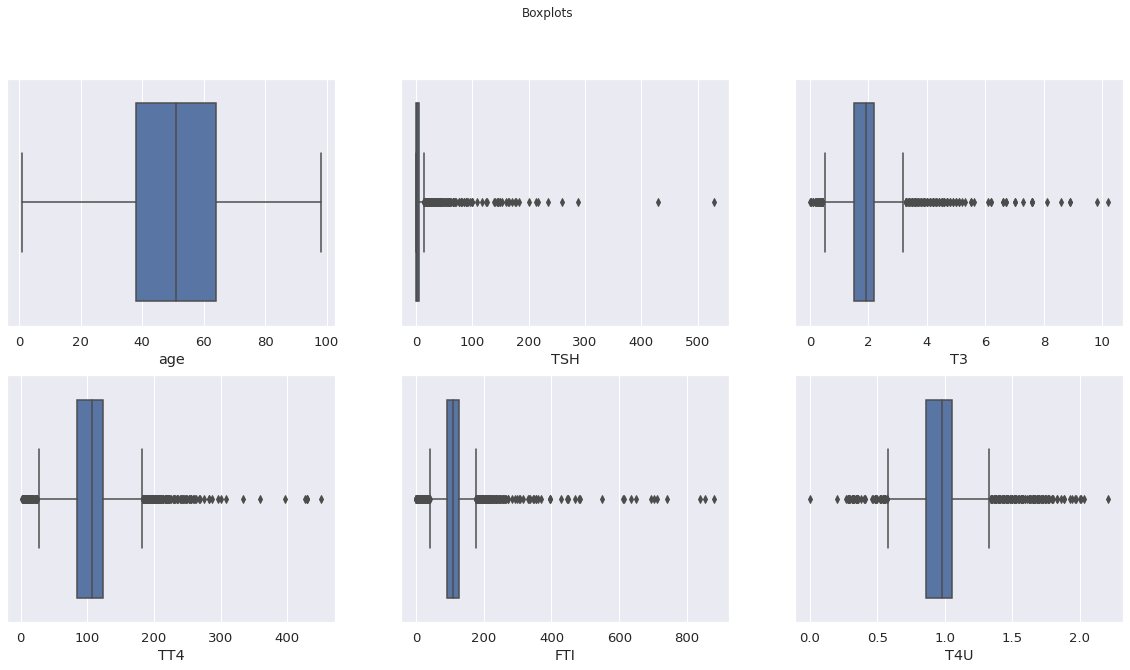

In [24]:
#Checking for outliers
#Plotting boxplots to visualize outliers in the dataset

float_col = ['TSH','T3', 'TT4', 'T4U', 'FTI', 'age']
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(20, 10))
fig.suptitle('Boxplots')
sns.boxplot(hypothyroid['age'], ax=ax1)
sns.boxplot(hypothyroid['TSH'], ax=ax2)
sns.boxplot(hypothyroid['T3'], ax=ax3)
sns.boxplot(hypothyroid['TT4'], ax=ax4)
sns.boxplot(hypothyroid['FTI'], ax=ax5)
sns.boxplot(hypothyroid['T4U'], ax=ax6)
plt.show()


In [25]:
# getting rid of the outliers

# Q1 = house.quantile(0.25)
# Q3 = house.quantile(0.75)
# IQR = Q3 - Q1
# house = house[~((house < (Q1 - 1.5 * IQR)) | (house > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(house.shape)

##**6**. Exploratory Data Analysis

### 6.1 Univariate Analysis


In [26]:
# getting a statistical summary of our dataset

hypothyroid.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,5.809320,1.933666,108.706922,0.977559,115.489080
std,17.854431,22.180994,0.864826,42.836471,0.216873,57.780967
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.112538,1.000000,1.933666,107.000000,0.977559,110.000000
75%,64.000000,5.809320,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


In [27]:
# getting the median of the continuous variables

float_col = ['TSH','T3', 'TT4', 'T4U', 'FTI', 'age']

median1 = hypothyroid[float_col].median()

median1.sort_values(ascending=False)


FTI    110.000000
TT4    107.000000
age     51.112538
T3       1.933666
TSH      1.000000
T4U      0.977559
dtype: float64

In [28]:
# getting the skewness of the continuous variables
# 

float_col = ['TSH','T3', 'TT4', 'T4U', 'FTI', 'age']

skewed = hypothyroid[float_col].skew()

skewed.sort_values(ascending=False)


TSH    11.145457
FTI     5.425255
T3      2.453770
TT4     1.528402
T4U     0.991289
age    -0.183279
dtype: float64

In [29]:
# getting the kurtosis of the continuous variables
# 

float_col = ['TSH','T3', 'TT4', 'T4U', 'FTI', 'age']

kurt1 = hypothyroid[float_col].kurt()

kurt1.sort_values(ascending=False)


TSH    180.713221
FTI     52.799848
T3      14.891061
TT4      7.679570
T4U      3.970968
age     -0.621452
dtype: float64

In [30]:
# getting the variance of the continuous variables
# 

float_col = ['TSH','T3', 'TT4', 'T4U', 'FTI', 'age']

var1 = hypothyroid[float_col].var()

var1.sort_values(ascending=False)


FTI    3338.640107
TT4    1834.963265
TSH     491.996510
age     318.780701
T3        0.747925
T4U       0.047034
dtype: float64

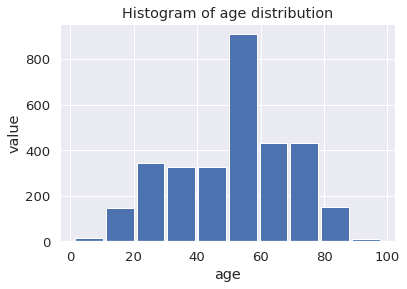

In [31]:
# plotting a histogram to show age distribution.
# 

age1 = hypothyroid['age']

plt.hist(age1, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('age')
plt.ylabel('value')
plt.title('Histogram of age distribution') 
plt.show()

In [32]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

Observations:


*   Most of the participants of the clinical camp are between the age of 50 to 60 years



Categorical Variables

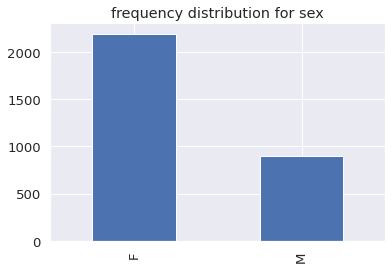

In [33]:
#  bar chart for sex
# 

hypothyroid['sex'].value_counts().plot.bar(title='frequency distribution for sex')


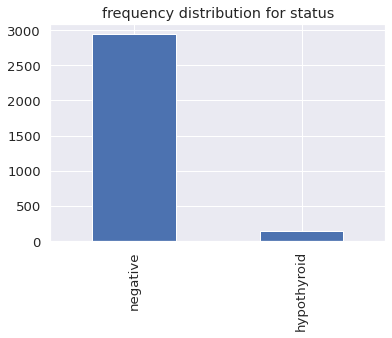

In [34]:
#  bar chart for status
# 

hypothyroid['status'].value_counts().plot.bar(title='frequency distribution for status')


Observations


*   There were more females than males at the clinical camp
*   Most participants were found to be negative of hypothyroidsm



### 6.2 Bivariate Analysis

In [35]:
# Getting the correlation matrix
# 

correlations = hypothyroid.corr()
correlations

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.007352,-0.265743,-0.086317,-0.188786,0.017737
TSH,-0.007352,1.000000,-0.169724,-0.309057,0.072508,-0.240105
T3,-0.265743,-0.169724,1.000000,0.533845,0.386450,0.281517
TT4,-0.086317,-0.309057,0.533845,1.000000,0.320415,0.677345
T4U,-0.188786,0.072508,0.386450,0.320415,1.000000,-0.294437
FTI,0.017737,-0.240105,0.281517,0.677345,-0.294437,1.000000


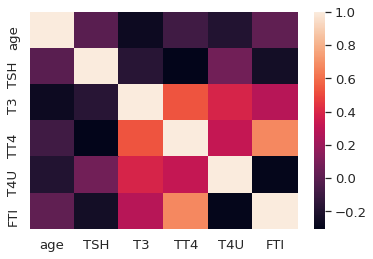

In [36]:
# plotting a heatmap
# 

import seaborn as sns

sns.heatmap(hypothyroid.corr())


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


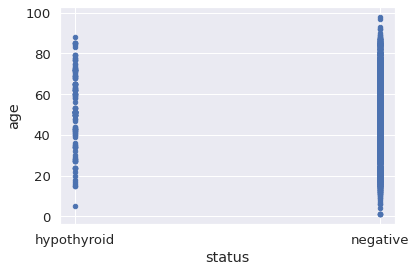

In [37]:
# plotting a scatter plot of the sqft living and price
# 

hypothyroid.plot(x = 'status', y = 'age', kind='scatter')


##**7**. Implementing the Solution

### Modeling

#### Random Forest

#### Gradient boosting

#### Support vector machine(SVM)
     * Linear
     * Polynomial
     * Radial basis function(rbf)


#### 1.Random Forest

In [38]:
# Split the independent and dependent variables
# We want to predict if someone has hypothyroidisim or not, so we'll use the status column as our Y 

y = np.where(hypothyroid.status == 'hypothyroid', 1, 0)


test_features = hypothyroid.columns.to_list()
test_features.remove('status')

X = hypothyroid[test_features]
X = pd.get_dummies(X)

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# We set our parameters, min_samples_split or max_depth

forest = RandomForestClassifier(random_state=42)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.040453,0.035599
std,0.197179,0.185438
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [39]:
# To check the performance of our model
# 

print('The accuracy score is :', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


The accuracy score is : 0.9919093851132686
[[592   1]
 [  4  21]]


In [40]:
# to assess the performance of our random forest
# 

from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.008090614886731391
Mean Squared Error: 0.008090614886731391
Root Mean Squared Error: 0.0899478453701443


Visualising the 50th tree

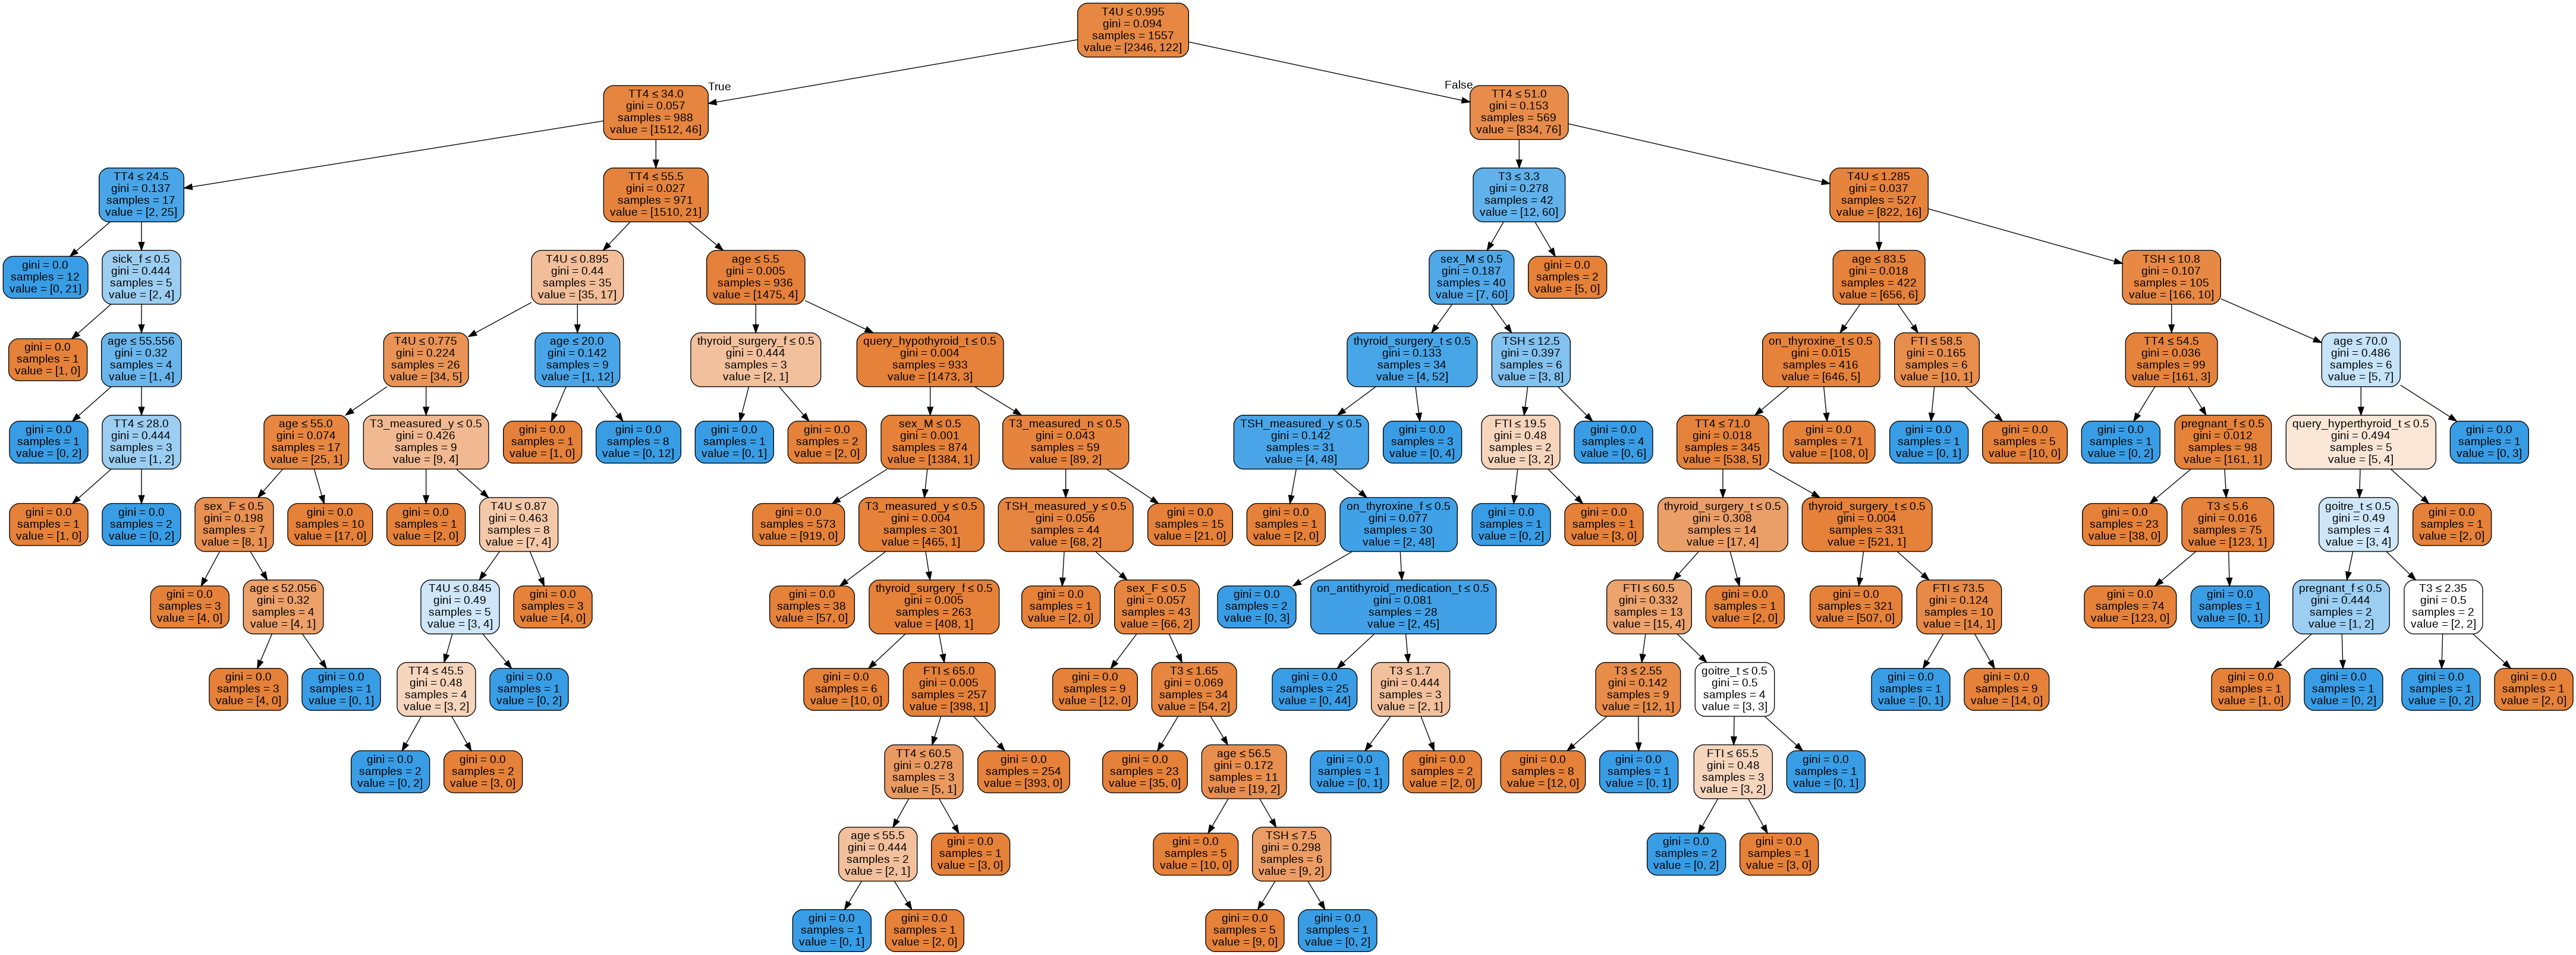

In [41]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

In [42]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(forest.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df


,importance
feature,
TSH,0.2920
FTI,0.2620
TT4,0.2229
T3,0.0750
T4U,0.0395
age,0.0372
query_hypothyroid_t,0.0058
on_thyroxine_t,0.0055
on_thyroxine_f,0.0053


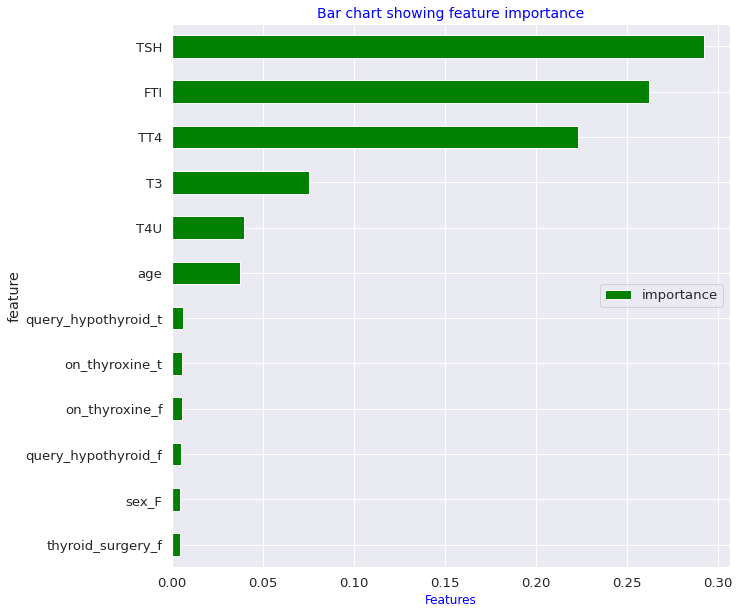

In [43]:
# Creating a bar chart of feature importance in descending order
#
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'green')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'blue', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'blue')
plt.show()

Building a model with the most important features

In [45]:
# Selecting only important features and the y variable
#
X = X[['FTI', 'TSH', 'TT4', 'T3', 'T4U', 'age']]

y = np.where(hypothyroid.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print('The accuracy score is :', accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

The accuracy score is : 0.9919093851132686
[[591   2]
 [  3  22]]


There is no major difference in the accuracy score in the model built using the most important features.

Hyperparameter tuning

In [46]:
# Split the independent and dependent variables
# We want to predict if someone has hypothyroidisim or not, so we'll use the status column as our Y 

y = np.where(hypothyroid.status == 'hypothyroid', 1, 0)


test_features = hypothyroid.columns.to_list()
test_features.remove('status')

X = hypothyroid[test_features]
X = pd.get_dummies(X)

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# We set our parameters, min_samples_split or max_depth

forest = RandomForestClassifier(n_estimators = 100, random_state=0, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.040453,0.030744
std,0.197179,0.172764
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [47]:
# checking the performance of the model
# 

print('The accuracy score is :', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


The accuracy score is : 0.9870550161812298
[[592   1]
 [  7  18]]


#### 2.Ada booster

In [48]:
from sklearn.ensemble import AdaBoostClassifier

# The adaboost needs a simple decision tree in its constructor. 
# 

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),
                          n_estimators=300, random_state=0)

ada = ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)



In [49]:
# Measuring the accuracy of the model
#

from sklearn.metrics import f1_score
acc_ada = accuracy_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

print(f'The accuracy score is: {acc_ada} and the f1 score is {f1_ada}')
print('\n')
print(confusion_matrix(y_test, y_pred_ada))

The accuracy score is: 0.9935275080906149 and the f1 score is 0.92


[[591   2]
 [  2  23]]


Feature Importance

In [50]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_ada = pd.DataFrame({'feature': X.columns, 'importance': ada.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_ada


,importance
feature,
TSH,1.825656e-01
age,1.704378e-01
FTI,1.656828e-01
T4U,1.491936e-01
T3,1.240858e-01
TT4,8.260800e-02
sex_M,1.809002e-02
on_antithyroid_medication_t,1.651120e-02
on_antithyroid_medication_f,1.525241e-02


Building a model with the most important features

In [51]:
# Selecting only important features and the y variable
#
X = X[['FTI', 'TSH', 'TT4', 'T3', 'T4U', 'age']]

y = np.where(hypothyroid.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Instantiating the model
#
ada1 = AdaBoostClassifier(random_state = 0)
ada1.fit(X_train, y_train)

# Making predictions
#
y_pred = ada1.predict(X_test)

# Measuring the accuracy of the model
#
print(accuracy_score(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

0.9919093851132686


[[592   1]
 [  4  21]]


Using the features of most importance gives a slightly lower accuracy score meaning the other features contribute to the overall performance of the model.

Parameter Tuning

In [52]:
from sklearn.ensemble import AdaBoostClassifier

# The adaboost needs a simple decision tree in its constructor. 
# 

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                          n_estimators=500, random_state=0)

ada = ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)


In [53]:
# Measuring the accuracy of the model
#

from sklearn.metrics import f1_score
acc_ada = accuracy_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

print(f'The accuracy score is: {acc_ada} and the f1 score is {f1_ada}')
print('\n')
print(confusion_matrix(y_test, y_pred_ada))

The accuracy score is: 0.9919093851132686 and the f1 score is 0.9019607843137256


[[590   3]
 [  2  23]]


Using a maximum depth of 6 and n_estimators of 300 gives us the highest accuracy score of ada boost classifier.

#### 3.Support Vector Machine

##### 3.1 Linear Function

In [54]:
# Split the independent and dependent variables
# We want to predict if someone has hypothyroidisim or not, so we'll use the status column as our Y 

y = np.where(hypothyroid.status == 'hypothyroid', 1, 0)


test_features = hypothyroid.columns.to_list()
test_features.remove('status')

X = hypothyroid[test_features]
X = pd.get_dummies(X)

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [55]:
# Fit the model
model1 = SVC(kernel= 'linear')
model1.fit(X_train,y_train)

# Predict the response for the test set
y_pred = model1.predict(X_test)


In [56]:
# Now that we have trained our model, let's test how well it can predict the hypothyroidism of a patient

# Checking the accuracy of the model

print('The accuracy score is :', accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test, y_pred))


The accuracy score is : 0.9870550161812298
[[591   2]
 [  6  19]]


##### 3.2 Polynomial Function

In [57]:
# Split the independent and dependent variables
# We want to predict if someone has hypothyroidisim or not, so we'll use the status column as our Y 

y = np.where(hypothyroid.status == 'hypothyroid', 1, 0)


test_features = hypothyroid.columns.to_list()
test_features.remove('status')

X = hypothyroid[test_features]
X = pd.get_dummies(X)

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [58]:
# Building the polynomial model 
# 
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')

# Training the model using the training set
polyclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
# Predict the response for the test set

y_pred = polyclassifier.predict(X_test)


In [60]:
# Now that we have trained our model, let's test how well it can predict the hypothyroidism of a patient

# Checking the accurancy of the model
print('The accuracy score is :', accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test, y_pred))


The accuracy score is : 0.9789644012944984
[[593   0]
 [ 13  12]]


Parameter Tuning

In [61]:
# Building the polynomial model 
# 
polyclassifier = SVC(kernel='poly',degree=1,gamma='scale')

# Training the model using the training set
polyclassifier.fit(X_train, y_train)

# Predict the response for the test set

y_pred = polyclassifier.predict(X_test)

# Now that we have trained our model, let's test how well it can predict the hypothyroidism of a patient

# Checking the accurancy of the model
print('The accuracy score is :', accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test, y_pred))


The accuracy score is : 0.9854368932038835
[[591   2]
 [  7  18]]


We get a higher accuracy score when we reduce the degree parameter to 1 as compared to using the initial 3. This would mean that our data is more linear.


##### 3.3 Radial Basis Function

In [62]:
# Split the independent and dependent variables
# We want to predict if someone has hypothyroidisim or not, so we'll use the status column as our Y 

y = np.where(hypothyroid.status == 'hypothyroid', 1, 0)


test_features = hypothyroid.columns.to_list()
test_features.remove('status')

X = hypothyroid[test_features]
X = pd.get_dummies(X)

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [63]:
# Building the model 

rbfclassifier = SVC(kernel='rbf', degree=5)

# Training the model using the training set

rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred = rbfclassifier.predict(X_test)


In [64]:
# Model Evaluation

print('The accuracy score is :', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


The accuracy score is : 0.9854368932038835
[[591   2]
 [  7  18]]


There is a slight increase in the accuracy score while using the rbf function

Parameter Tuning

In [65]:
# Building the model 

rbfclassifier = SVC(kernel='rbf', degree=3)

# Training the model using the training set

rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred_rbf = rbfclassifier.predict(X_test)


In [66]:
# Model Evaluation

print('The accuracy score is :', accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))

The accuracy score is : 0.9854368932038835
[[591   2]
 [  7  18]]


There is no meaningful change in the accuracy score after performing hyperparameter tuning

##**8**. Challenging the solution

Challenging the Random Forest Solution using the gradient booster.

In [67]:
# importing and training our model
# 

from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)


In [68]:
# checking the performance of the model
# 

print('The accuracy score is :', accuracy_score(y_test, y_pred_gbr))
print(confusion_matrix(y_test, y_pred_gbr))


The accuracy score is : 0.9919093851132686
[[590   3]
 [  2  23]]


There is no significant difference in the accuracy score between the Random Forest and the Gradient booster.
So we choose to use ada booster which has a higher accuracy score.

Challenging the SVM Solution using the sigmoid function seeing that it is more suited for binary classification.

In [69]:
# Building the model

sigclassifier = SVC(kernel='sigmoid')

# Training the model using the training set

sigclassifier.fit(X_train, y_train)

# make predictions using our trained model

y_pred_sig = sigclassifier.predict(X_test)

In [70]:
# checking for our models performance
# 

print('The accuracy score is :', accuracy_score(y_test, y_pred_sig))
print(confusion_matrix(y_test, y_pred_sig))


The accuracy score is : 0.9627831715210357
[[580  13]
 [ 10  15]]


### Conclusion
* Ada booster is the best performing model with an accuracy score of 99.352.
* It is followed by random forest, rbf, linear function and lastly polynomial model.

### Recommendations

We'd recommend the use of Ada booster since it has the highest accuracy score of 99.35% which is quite commendable in the medical field.


##**9**. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes we did, we had a good sample size that looked into key factors that would help us create a model that will accurately predict whether or not a patient symptoms indicate that the patient has hypothyroid.

### b). Do we need other data to answer our question?
Not necessarily because the dataset we used answered our question.

### c). Did we have the right question?

Yes we did, we were able to create models that helped accurately predict whether or not a patient symptoms indicate that the patient has hypothyroid.
